In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Zadanie 1

In [2]:
class SchellingAutomaton:
    def __init__(self, size: int, init_prob: float, min_n_neigh: int, types: list[int] = (1, 2)) -> None:
        self.size = size
        self.init_prob = init_prob
        self.min_n_neigh = min_n_neigh
        self.types = types

        self.map = np.zeros((self.size, self.size))
        self.agents = {t: [] for t in self.types}
        self.init_agents()

    def init_agents(self) -> None:
        # generate map
        self.map = np.random.choice(self.types, size=(self.size, self.size)).astype(np.int8)
        mask = np.random.random((self.size, self.size))
        self.map[mask > self.init_prob] = 0

        # generate agents based on the map
        for x in range(self.size):
            for y in range(self.size):
                type_ = self.map[x, y]
                if type_ > 0:
                    self.agents[type_].append((x, y))

    def simulate_turn(self) -> None:
        for type_, agents in self.agents.items():
            for i, agent_position in enumerate(agents):
                agent_neigh = self._generate_neigh(*agent_position)
                n_neigh = self._count_neighbors(type_, agent_neigh)

                if n_neigh < self.min_n_neigh:
                    new_position = random.choice(agent_neigh)
                    if self.map[new_position] == 0:  # new position is empty - agent can move
                        agents[i] = new_position
                        self.map[agent_position] = 0
                        self.map[new_position] = type_

    def run(self, n: int) -> None:
        for _ in range(n):
            self.simulate_turn()

    def _count_neighbors(self, t: int, neigh: list[tuple[int, int]]) -> int:
        count = 0
        for x, y in neigh:
            if self.map[x, y] == t:
                count += 1
        return count

    def _generate_neigh(self, x: int, y: int) -> list[tuple[int, int]]:
        neigh = [(x - 1, y), (x - 1, y + 1), (x, y + 1), (x + 1, y + 1), (x + 1, y), (x + 1, y - 1), (x, y - 1), (x - 1, y - 1)]
        return [(new_x % self.size, new_y % self.size) for new_x, new_y in neigh]

In [7]:
A = SchellingAutomaton(size=100, init_prob=0.55, min_n_neigh=4, types=[1, 2])

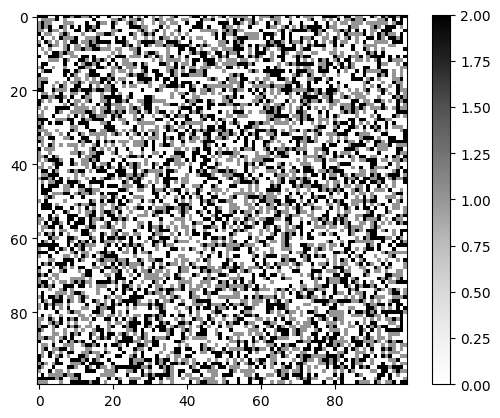

In [8]:
plt.imshow(A.map, cmap='Greys')
plt.colorbar()
plt.show()

In [9]:
A.run(500)

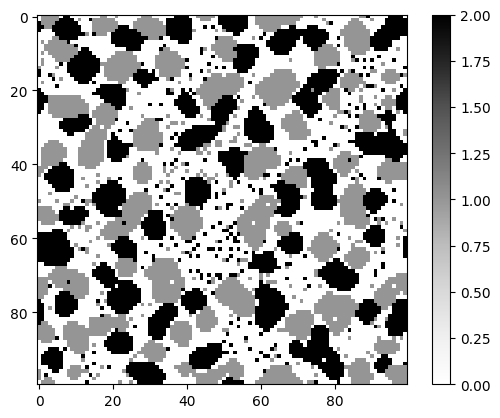

In [10]:
plt.imshow(A.map, cmap='Greys')
plt.colorbar()
plt.show()